In [1]:
MODEL_PATH = "model_checkpoints/mobilenet-epoch70-val58.h5"
DATASET_TRAIN = "dataset/train/"
DATASET_TEST = "dataset/test/"

In [6]:
import tensorflow
print(tensorflow.__version__)
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

import keras
from keras import *
import time
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix

2.1.0


In [12]:

_IMAGES_HEIGHT, _IMAGES_WIDTH = 224,224
_BATCH_SIZE = 100


train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_directory(
  directory=DATASET_TRAIN,
  target_size=(_IMAGES_HEIGHT, _IMAGES_WIDTH),
  batch_size=_BATCH_SIZE,
  class_mode='categorical', shuffle=False
)


test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_flow = test_generator.flow_from_directory(
  directory=DATASET_TEST,
  target_size=(_IMAGES_HEIGHT, _IMAGES_WIDTH),
  batch_size=_BATCH_SIZE,
  class_mode='categorical', shuffle=False
)

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [4]:
model = keras.models.load_model(MODEL_PATH)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

Confusion Matrix


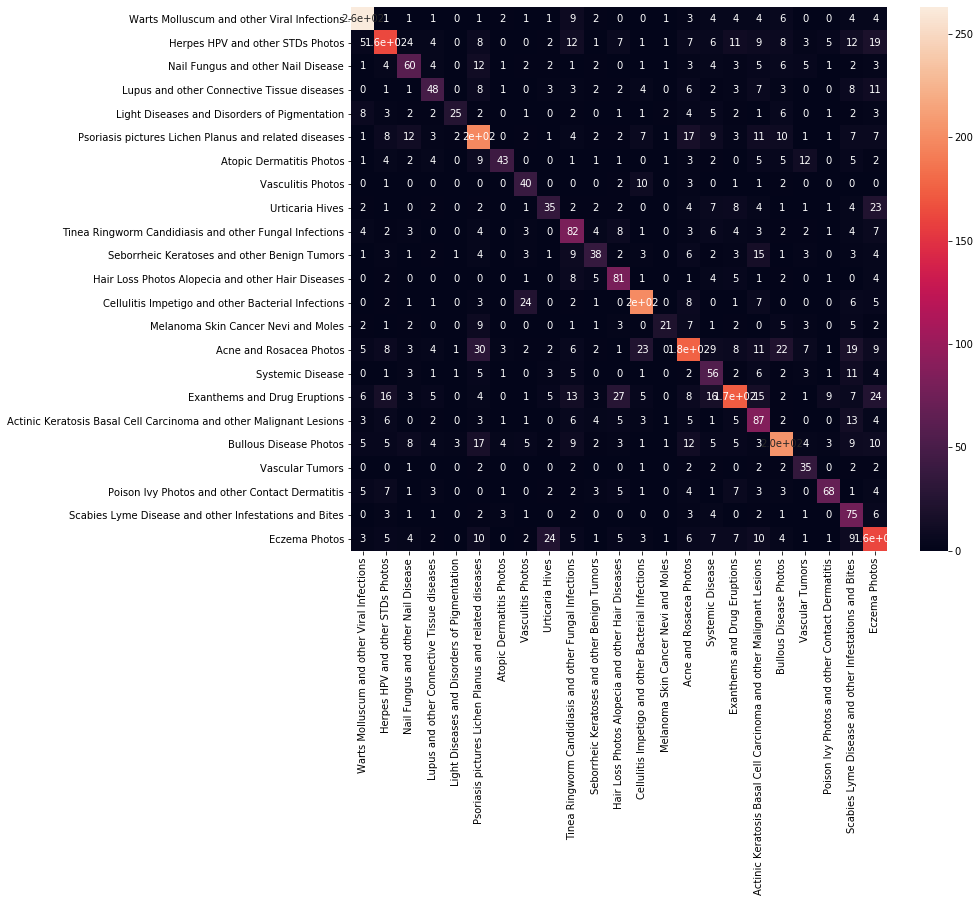

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os

y_pred = model.predict_generator(test_flow,steps = 4002/100)
y_predict = np.argmax(y_pred,axis=1)
print('Confusion Matrix')
matrix = confusion_matrix(test_flow.classes, y_predict) 

df_cm = pd.DataFrame(matrix, index = [i for i in os.listdir(DATASET_TEST)],
                  columns = [i for i in os.listdir(DATASET_TEST)])

plt.figure(figsize = (24,20))
sn.heatmap(df_cm, annot=True)

In [16]:
target_names = os.listdir(DATASET_TEST)
report = classification_report(test_flow.classes, y_predict, target_names=target_names) 
print(report)

                                                                    precision    recall  f1-score   support

                        Warts Molluscum and other Viral Infections       0.83      0.84      0.84       312
                                  Herpes HPV and other STDs Photos       0.66      0.57      0.61       288
                                Nail Fungus and other Nail Disease       0.53      0.49      0.51       123
                        Lupus and other Connective Tissue diseases       0.52      0.42      0.47       113
                      Light Diseases and Disorders of Pigmentation       0.76      0.34      0.47        73
             Psoriasis pictures Lichen Planus and related diseases       0.59      0.64      0.62       309
                                          Atopic Dermatitis Photos       0.72      0.43      0.53       101
                                                 Vasculitis Photos       0.44      0.67      0.53        60
                           

In [19]:
with open('records/test_report_70.txt','w') as f:
    f.write(report)

Confusion Matrix


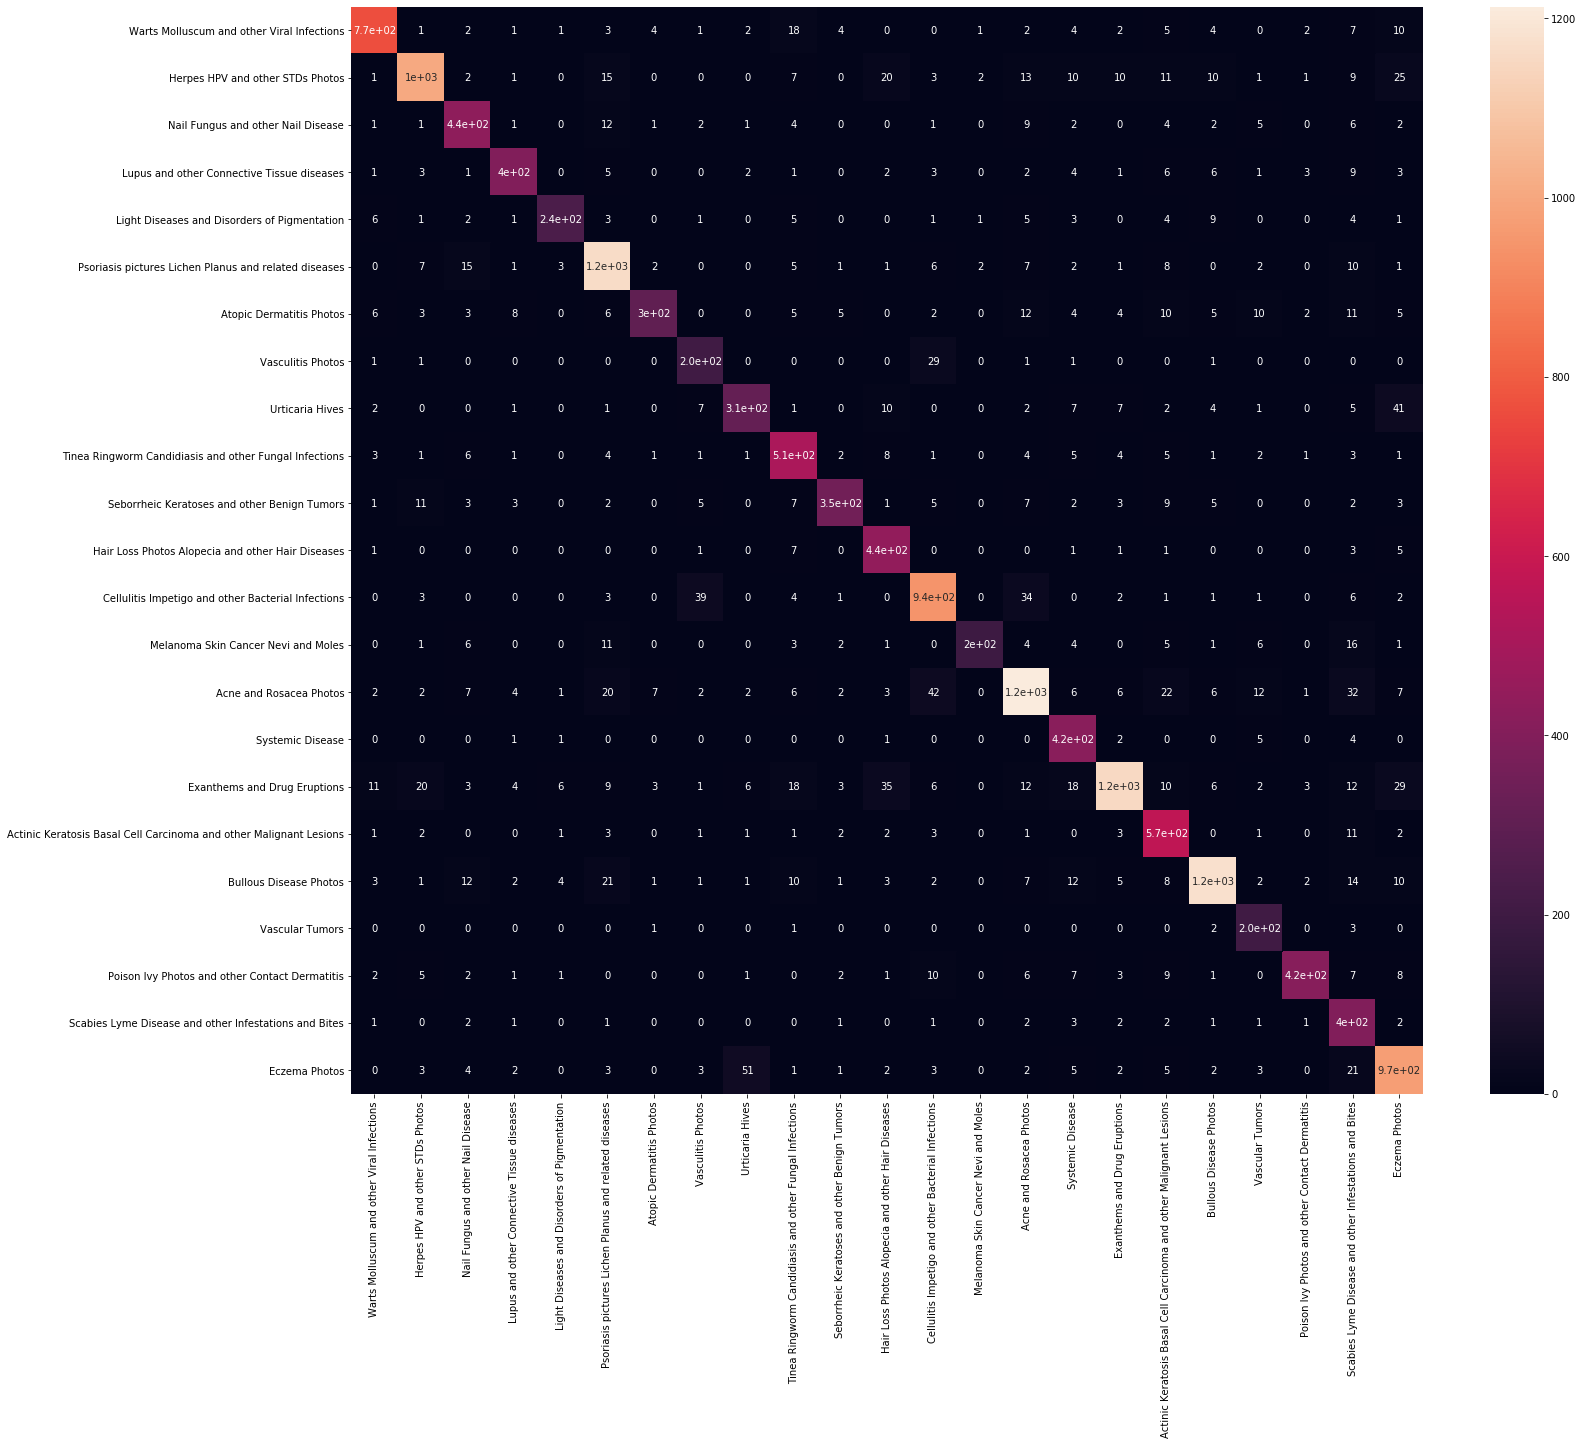

In [21]:
y_pred_train = model.predict_generator(train_flow,steps = 15557/100)
y_predict_train = np.argmax(y_pred_train,axis=1)
print('Confusion Matrix')
matrix_train = confusion_matrix(train_flow.classes, y_predict_train) 

df_cm_train = pd.DataFrame(matrix_train, index = [i for i in os.listdir(DATASET_TRAIN)],
                  columns = [i for i in os.listdir(DATASET_TRAIN)])

plt.figure(figsize = (24,20))
sn.heatmap(df_cm_train, annot=True)

In [22]:
target_names = os.listdir(DATASET_TRAIN)
report_train = classification_report(train_flow.classes, y_predict_train, target_names=target_names) 
print(report_train)
with open('records/train_report_70.txt','w') as f:
    f.write(report_train)

                                                                    precision    recall  f1-score   support

                        Warts Molluscum and other Viral Infections       0.95      0.91      0.93       840
                                  Herpes HPV and other STDs Photos       0.94      0.88      0.91      1149
                                Nail Fungus and other Nail Disease       0.86      0.89      0.88       489
                        Lupus and other Connective Tissue diseases       0.92      0.88      0.90       448
                      Light Diseases and Disorders of Pigmentation       0.93      0.84      0.88       288
             Psoriasis pictures Lichen Planus and related diseases       0.90      0.94      0.92      1235
                                          Atopic Dermatitis Photos       0.94      0.75      0.83       404
                                                 Vasculitis Photos       0.76      0.86      0.81       239
                           

In [26]:
with open('records/labels23.txt','w') as f:
    for name in os.listdir(DATASET_TRAIN):
        f.write(name+'\n')